Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [5]:
import pandas as pd
import numpy as np

data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

# Create a DataFrame from the dictionary and index labels

df = pd.DataFrame(data, index=labels)

# Print the DataFrame
print(df)

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  2.0       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no


**2.** Display a summary of the basic information about this DataFrame and its data (*hint: there is a single method that can be called on the DataFrame*).

In [6]:
# Display summary information about the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


**3.** Return the first 3 rows of the DataFrame `df`.

In [7]:
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


**4.** Display the 'animal' and 'age' columns from the DataFrame `df`

In [8]:
df[['animal', 'age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


**5.** Display the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']'

In [43]:
# Create a DataFrame from the dictionary data and list labels
df = pd.DataFrame(data, index=labels)

# Select the desired rows and columns using the .loc accessor
df.loc[['d', 'e', 'i'], ['animal', 'age']]


,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


**6.** Select only the rows where the number of visits is greater than 3.

In [14]:
# select only the rows where the number of visits is greater than 3
df = df[df['visits'] > 3]
print(df)

Empty DataFrame
Columns: [animal, age, visits, priority]
Index: []


**7.** Select the rows where the age is missing, i.e. it is `NaN`.

In [17]:
missing_age = df[pd.isnull(df['age'])]
print(missing_age)


Empty DataFrame
Columns: [animal, age, visits, priority]
Index: []


**8.** Select the rows where the animal is a cat *and* the age is less than 3.

In [20]:

# Convert 'age' column to numerical data type
df['age'] = pd.to_numeric(df['age'])

# Filter rows where animal is cat and age is less than 3
cat_under_3 = df[(df['animal'] == 'cat') & (df['age'] < 3)]

print(cat_under_3)


  animal  age  visits priority
0    cat  2.5       1      yes
5    cat  2.0       3       no


**9.** Select the rows where the age is between 2 and 4 (inclusive)

In [26]:
selected_rows = df[(df['age'] >= 2) & (df['age'] <= 4)]
print(selected_rows)

  animal  age  visits priority
0    cat  2.5       1      yes
1    cat  3.0       3      yes
5    cat  2.0       3       no
9    dog  3.0       1       no


**10.** Change the age in row 'f' to 1.5.

In [28]:
df.loc['f', 'age'] = 1.5

print(df)

  animal  age  visits priority
0    cat  2.5     1.0      yes
1    cat  3.0     3.0      yes
2  snake  0.5     2.0       no
3    dog  NaN     3.0      yes
4    dog  5.0     2.0       no
5    cat  2.0     3.0       no
6  snake  4.5     1.0       no
7    cat  NaN     1.0      yes
8    dog  7.0     2.0       no
9    dog  3.0     1.0       no
f    NaN  1.5     NaN      NaN


**11.** Calculate the sum of all visits in `df` (i.e. the total number of visits).

In [30]:
# Calculate the sum of all visits in df
total_visits = df['visits'].sum()
print(total_visits)

19.0


**12.** Calculate the mean age for each different animal in `df`.

In [31]:
df.groupby('animal')['age'].mean()

animal
cat      2.5
dog      5.0
snake    2.5
Name: age, dtype: float64

**13.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [33]:
# Define the values for the new row
new_row = {'animal': 'cat', 'age': 1.5, 'visits': 2, 'priority': 'no'}

# Append the new row to df
df.loc['k'] = new_row

# Delete the new row 'k' and return the original DataFrame
df.drop('k', inplace=True)
df

,animal,age,visits,priority
0,cat,2.5,1.0,yes
1,cat,3.0,3.0,yes
2,snake,0.5,2.0,no
3,dog,NaN,3.0,yes
4,dog,5.0,2.0,no
5,cat,2.0,3.0,no
6,snake,4.5,1.0,no
7,cat,NaN,1.0,yes
8,dog,7.0,2.0,no
9,dog,3.0,1.0,no


**14.** Count the number of each type of animal in `df`.

In [34]:
animal_counts = df['animal'].value_counts()
print(animal_counts)


cat      4
dog      4
snake    2
Name: animal, dtype: int64


**15.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order (so row `i` should be first, and row `d` should be last).

In [35]:
df_sorted = df.sort_values(by=['age', 'visits'], ascending=[False, True])
df

,animal,age,visits,priority
0,cat,2.5,1.0,yes
1,cat,3.0,3.0,yes
2,snake,0.5,2.0,no
3,dog,NaN,3.0,yes
4,dog,5.0,2.0,no
5,cat,2.0,3.0,no
6,snake,4.5,1.0,no
7,cat,NaN,1.0,yes
8,dog,7.0,2.0,no
9,dog,3.0,1.0,no


**16.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [38]:
df['priority'] = df['priority'].replace({'yes': True, 'no': False})
df

,animal,age,visits,priority
0,cat,2.5,1.0,True
1,cat,3.0,3.0,True
2,snake,0.5,2.0,False
3,dog,NaN,3.0,True
4,dog,5.0,2.0,False
5,cat,2.0,3.0,False
6,snake,4.5,1.0,False
7,cat,NaN,1.0,True
8,dog,7.0,2.0,False
9,dog,3.0,1.0,False


**17.** In the 'animal' column, change the 'snake' entries to 'python'.

In [39]:
df['animal'] = df['animal'].replace('snake', 'python')
df

,animal,age,visits,priority
0,cat,2.5,1.0,True
1,cat,3.0,3.0,True
2,python,0.5,2.0,False
3,dog,NaN,3.0,True
4,dog,5.0,2.0,False
5,cat,2.0,3.0,False
6,python,4.5,1.0,False
7,cat,NaN,1.0,True
8,dog,7.0,2.0,False
9,dog,3.0,1.0,False


**18.** Load the ny-flights dataset to Python

In [45]:
import pandas as pd

df = pd.read_csv('ny-flights.csv')
df

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01 00:00:00,AA,19805,N338AA,1,JFK,LAX,914.0,14.0,1238.0,13.0,0.0,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01 00:00:00,AA,19805,N335AA,3,JFK,LAX,1157.0,-3.0,1523.0,13.0,0.0,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01 00:00:00,AA,19805,N327AA,21,JFK,LAX,1902.0,2.0,2224.0,9.0,0.0,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01 00:00:00,AA,19805,N3EHAA,29,LGA,PBI,722.0,-8.0,1014.0,-26.0,0.0,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01 00:00:00,AA,19805,N319AA,117,JFK,LAX,1347.0,2.0,1706.0,1.0,0.0,2014-01-01 17:06:00,2014-01-01 13:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20812,2014-01-31 00:00:00,UA,19977,N54711,1253,ROC,ORD,801.0,-4.0,908.0,4.0,0.0,2014-01-31 09:08:00,2014-01-31 08:01:00
20813,2014-01-31 00:00:00,UA,19977,N77525,1429,LGA,CLE,1522.0,-10.0,1649.0,-31.0,0.0,2014-01-31 16:49:00,2014-01-31 15:22:00
20814,2014-01-31 00:00:00,UA,19977,N37293,1456,LGA,IAH,719.0,-6.0,1006.0,-20.0,0.0,2014-01-31 10:06:00,2014-01-31 07:19:00
20815,2014-01-31 00:00:00,UA,19977,N24729,1457,LGA,IAH,852.0,7.0,1156.0,-6.0,0.0,2014-01-31 11:56:00,2014-01-31 08:52:00


**19.** Which airline ID is present maximum times in the dataset

In [46]:
# Group by 'airline' and count the number of times each ID appears
airline_counts = df.groupby('airline_id')['airline_id'].count()

# Sort the counts in descending order and return the ID with maximum count
max_count_id = airline_counts.sort_values(ascending=False).idxmax()

print("Airline ID with maximum counts: ", max_count_id)

Airline ID with maximum counts:  20409


**20.** Draw a plot between dep_delay and arr_delay

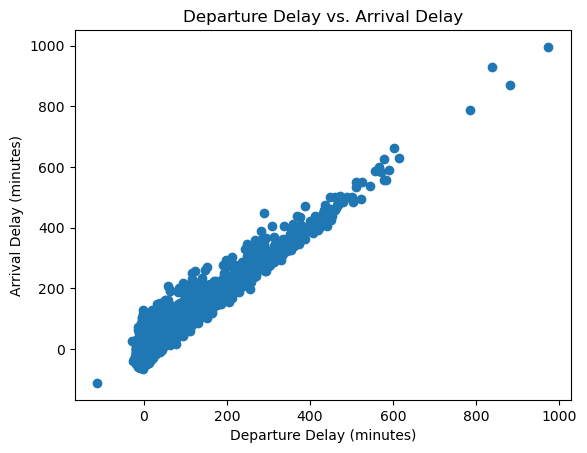

In [48]:
import matplotlib.pyplot as plt
# Plot the scatter plot
plt.scatter(df['dep_delay'], df['arr_delay'])

# Add labels and title
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.title('Departure Delay vs. Arrival Delay')

# Show the plot
plt.show()